In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import gca
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os.path
!pip install seaborn
import seaborn as sns

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\ch328575\AppData\Local\pip\Cache\wheels\26\0a\44\53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn


You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [92]:
def getGoodName(factor):
    xlab = factor
    factors = ['CompareDistance', 'CompareQuality', 'CompareDryness', 'CompareWater', 'CompareYield', 'HomophilyAge', 'HomophilyCornStocks', 'flee.migrate', 'SocialPresence']
    options = {factors[0] : "Compare Distance",
           factors[1] : 'Compare Quality',
           factors[2] : "Compare Dryness",
           factors[3] : "Compare Water",
           factors[4] : "Compare Yield",
           factors[5] : "Homophily by Age",
           factors[6] : "Homophily by Food Stocks",
           factors[7] : 'Migrate from Zone', 
        factors[8]:'Social Presence',
    }
    xlab = options[factor]
    return xlab

'Homophily by Food Stocks'

In [93]:
def plot_marginal_from_data(factor):
    filename = "./pos." + str(factor) + ".png.txt"
    plot_data = pd.read_csv(filename, error_bad_lines=False, header = None)
    plot_data = plot_data.T
    plt.plot(plot_data.iloc[:,0], plot_data.iloc[:,1])
    plt.fill_between(plot_data.iloc[:,0], plot_data.iloc[:,1]+plot_data.iloc[:,2], plot_data.iloc[:,1]-plot_data.iloc[:,2], facecolor='red', alpha=0.4) #NGUYEN: change color from red to yello
    plt.ylabel("L2 Error", fontsize = 16)
    plt.xlabel(getGoodName(factor), fontsize = 16)
    plt.savefig(filename[:-7] + "eps",dpi=72)
    plt.savefig(filename[:-7] + "png",dpi=72)
    plt.show()

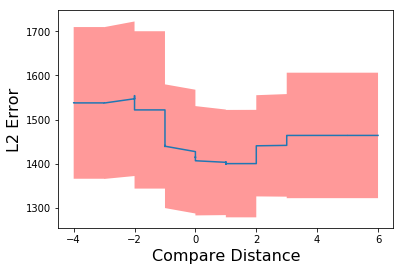

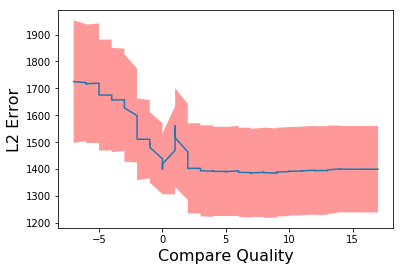

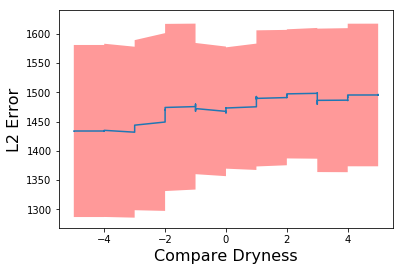

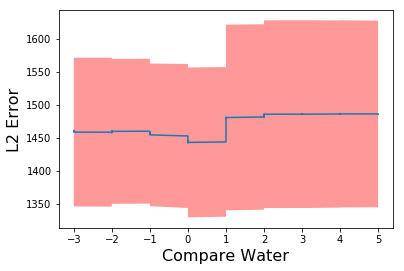

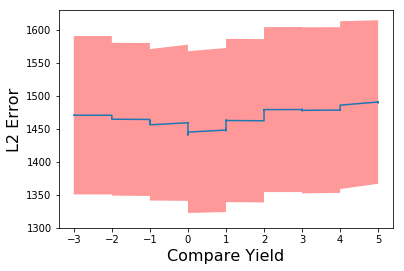

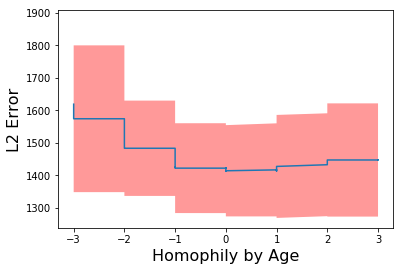

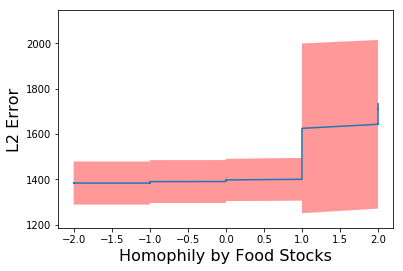

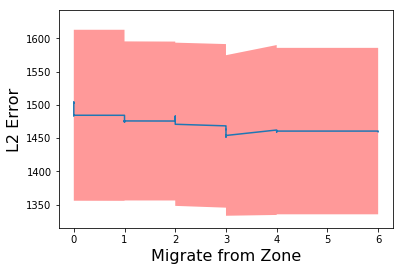

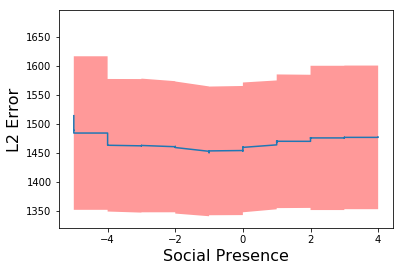

In [94]:
factors = ['CompareDistance', 'CompareQuality', 'CompareDryness', 'CompareWater', 'CompareYield', 'HomophilyAge', 'HomophilyCornStocks', 'flee.migrate', 'SocialPresence']
for factor in factors:
    plot_marginal_from_data(factor)

plotting CompareQuality with CompareDistance


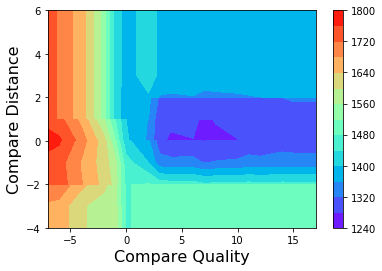

plotting CompareQuality with CompareDryness


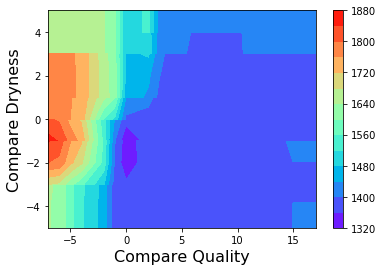

plotting CompareDryness with CompareDistance


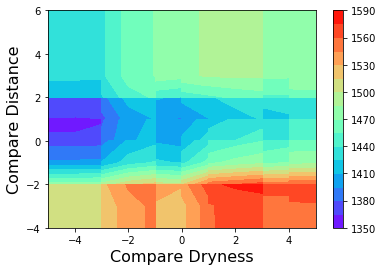

plotting CompareWater with CompareQuality


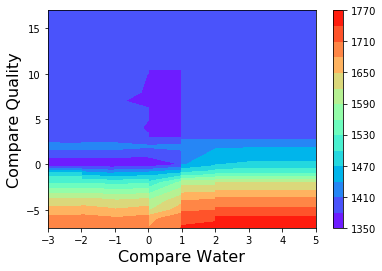

plotting CompareWater with CompareDryness


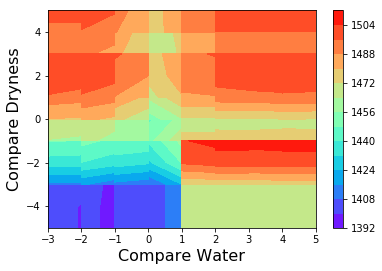

plotting CompareYield with CompareDistance


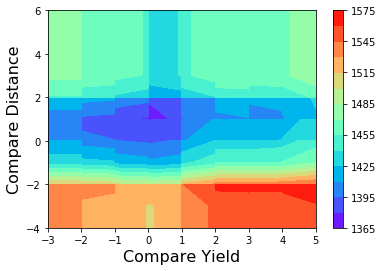

plotting CompareYield with CompareQuality


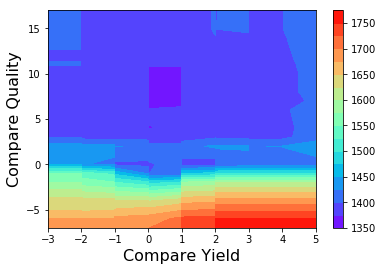

plotting CompareYield with CompareDryness


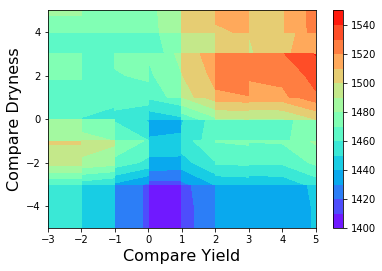

plotting HomophilyAge with CompareDistance


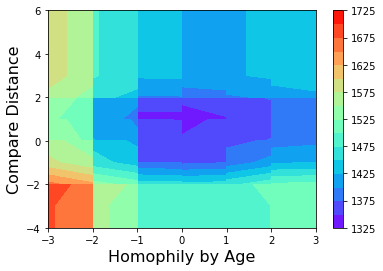

plotting HomophilyAge with CompareQuality


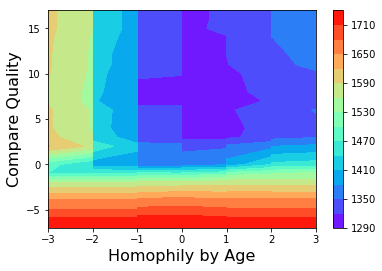

plotting HomophilyCornStocks with CompareDistance


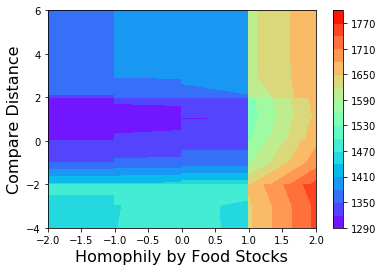

plotting HomophilyCornStocks with CompareQuality


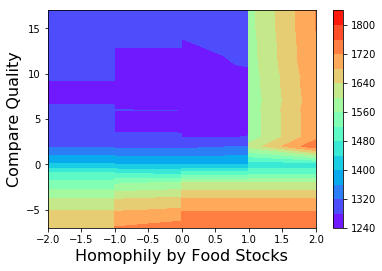

plotting HomophilyCornStocks with CompareYield


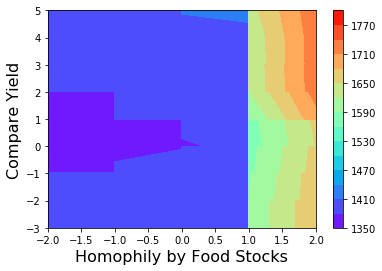

plotting HomophilyCornStocks with HomophilyAge


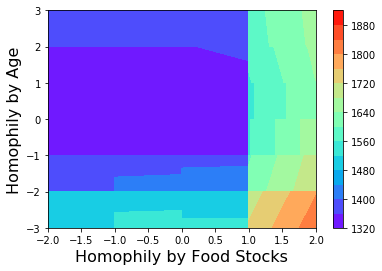

plotting flee.migrate with CompareDistance


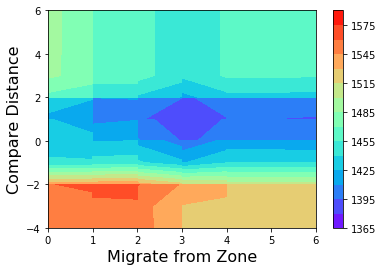

plotting flee.migrate with CompareQuality


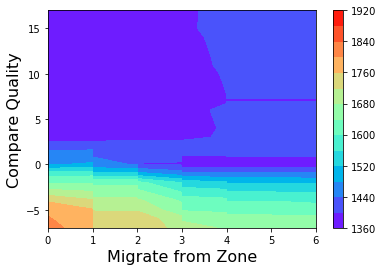

plotting flee.migrate with CompareDryness


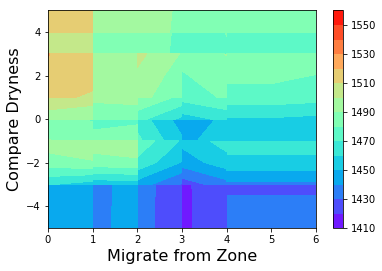

plotting SocialPresence with CompareDistance


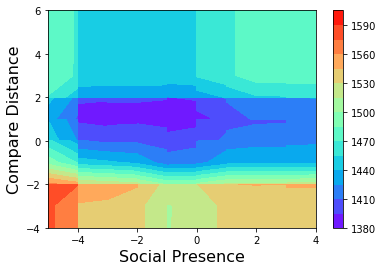

plotting SocialPresence with CompareQuality


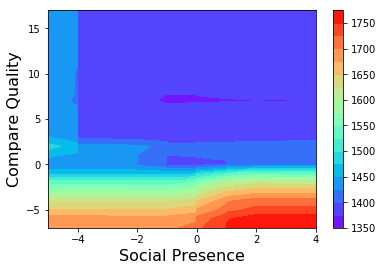

plotting SocialPresence with HomophilyCornStocks


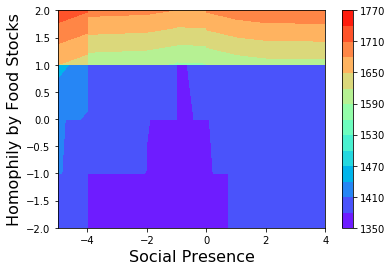

In [97]:
def plot_pairwise_marginal_from_data(param_name_1, param_name_2,azim = 140,elev = 10):
    filename = "pos." + param_name_1 + "_pos." + param_name_2 + ".png.txt"
    if ( os.path.exists(filename) == False):
        return
    f = open(filename, 'r')
    print("plotting " + param_name_1 + " with " + param_name_2)
    factor_line = f.readline()
    lines = factor_line[1:-2].split("],[")
    factor1 = []
    for line in lines:
        factor1.append(line.split(","))
    factor1 = np.asarray(factor1).astype(float)
    
    factor_line = f.readline()
    lines = factor_line[1:-2].split("],[")
    factor2 = []
    for line in lines:
        factor2.append(line.split(","))
    factor2 = np.asarray(factor2).astype(float)
    
    cost_line = f.readline()
    lines = cost_line[1:-2].split("],[")
    cost = []
    for line in lines:
        cost.append(line.split(","))
    cost = np.asarray(cost).astype(float)
    fig = plt.figure()        
    #ax = fig.gca(projection='3d')
    #ax = Axes3D(fig)
    
    #surface = ax.plot_surface(factor1, factor2, cost, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    cs = plt.contourf(factor1, factor2, cost, 15, cmap=plt.cm.rainbow)
    plt.xlabel(getGoodName(param_name_1), fontsize=16)
    plt.ylabel(getGoodName(param_name_2), fontsize=16)
    plt.colorbar(cs)
    #ax = sns.heatmap(cost, linewidth=0.5)
    #ax.set_xlabel(param_name_1, fontsize=14)
    #ax.set_ylabel(param_name_2, fontsize=14)
    #ax.set_zlabel("Cost", fontsize=14)
    #fig.colorbar(surface, shrink=0.5, aspect=5)
    #print (str(ax.elev) + " " + str(ax.azim) + " " )
    # Set rotation angle to 30 degrees
    #ax.view_init(azim=azim,elev=elev)
    
    plt.savefig(filename[:-7] + "eps",dpi=72)
    plt.savefig(filename[:-7] + "png",dpi=72)
    plt.show()
for factori in factors:
    for factorj in factors:
        plot_pairwise_marginal_from_data(factori,factorj)